In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import matplotlib as mpl
import seaborn as sns  
from scipy.stats import norm
from scipy.stats import ttest_ind
import statistics
from IPython.display import Image
%matplotlib inline     
sns.set(color_codes=True)

In [46]:
df = pd.read_excel("data\AdvWorksData.xlsx")

In [3]:
# To display the top 5 rows 
df.head(5)  

,productcategory,productsubcategory,product,saleterritory,Country,City,Sate,Customer,Employee,OrderCount,OrderDate,StandardCost,UnitPrice,UnitPriceDiscount,Discount,ListPrice,SaleswithStandard,NetSales,OrderQuantity,Sales
0,Clothing,Caps,AWC Logo Cap,United Kingdom,United Kingdom,Berks,England,Gary Suess,Amy Alberts,1,2012-06-30,6.9223,5.0136,0.02,1.4038,8.6442,96.9122,-28.125608,14,68.786592
1,Accessories,Locks,Cable Lock,United Kingdom,United Kingdom,Berks,England,Gary Suess,Amy Alberts,1,2012-06-30,10.3125,15.0000,0.00,0.0000,25.0000,61.8750,28.125000,6,90.000000
2,Clothing,Gloves,"Full-Finger Gloves, L",United Kingdom,United Kingdom,Berks,England,Gary Suess,Amy Alberts,1,2012-06-30,15.6709,22.7940,0.00,0.0000,37.9900,125.3672,56.984800,8,182.352000
3,Clothing,Gloves,"Full-Finger Gloves, L",United Kingdom,United Kingdom,London,England,Linda Martin,Amy Alberts,1,2012-06-30,15.6709,20.8945,0.05,16.7156,37.9900,250.7344,66.862000,16,317.596400
4,Clothing,Gloves,"Full-Finger Gloves, M",United Kingdom,United Kingdom,Berks,England,Gary Suess,Amy Alberts,1,2012-06-30,15.6709,22.7940,0.00,0.0000,37.9900,109.6963,49.861700,7,159.558000


In [4]:
df.tail()

,productcategory,productsubcategory,product,saleterritory,Country,City,Sate,Customer,Employee,OrderCount,OrderDate,StandardCost,UnitPrice,UnitPriceDiscount,Discount,ListPrice,SaleswithStandard,NetSales,OrderQuantity,Sales
60875,Clothing,Shorts,"Women's Mountain Shorts, L",Southeast,United States,Decatur,Georgia,Pamela Cox,Tsvi Reiter,1,2014-05-01,26.1763,41.994,0.0,0.0,69.99,209.4104,126.5416,8,335.952
60876,Clothing,Shorts,"Women's Mountain Shorts, L",Southeast,United States,Miami,Florida,Stephanie Conroy,Tsvi Reiter,1,2014-05-01,26.1763,41.994,0.0,0.0,69.99,157.0578,94.9062,6,251.964
60877,Clothing,Shorts,"Women's Mountain Shorts, M",Southeast,United States,Decatur,Georgia,Pamela Cox,Tsvi Reiter,1,2014-05-01,26.1763,41.994,0.0,0.0,69.99,78.5289,47.4531,3,125.982
60878,Clothing,Shorts,"Women's Mountain Shorts, S",Southeast,United States,Decatur,Georgia,Pamela Cox,Tsvi Reiter,1,2014-05-01,26.1763,41.994,0.0,0.0,69.99,130.8815,79.0885,5,209.970
60879,Clothing,Shorts,"Women's Mountain Shorts, S",Southeast,United States,Miami,Florida,Stephanie Conroy,Tsvi Reiter,1,2014-05-01,26.1763,41.994,0.0,0.0,69.99,78.5289,47.4531,3,125.982


In [5]:
df.dtypes

productcategory               object
productsubcategory            object
product                       object
saleterritory                 object
Country                       object
City                          object
Sate                          object
Customer                      object
Employee                      object
OrderCount                     int64
OrderDate             datetime64[ns]
StandardCost                 float64
UnitPrice                    float64
UnitPriceDiscount            float64
Discount                     float64
ListPrice                    float64
SaleswithStandard            float64
NetSales                     float64
OrderQuantity                  int64
Sales                        float64
dtype: object

In [6]:
df.columns

Index(['productcategory', 'productsubcategory', 'product', 'saleterritory',
       'Country', 'City', 'Sate', 'Customer', 'Employee', 'OrderCount',
       'OrderDate', 'StandardCost', 'UnitPrice', 'UnitPriceDiscount',
       'Discount', 'ListPrice', 'SaleswithStandard', 'NetSales',
       'OrderQuantity', 'Sales'],
      dtype='object')

In [7]:
#let's drop the irrelevant columns
df = df[['productcategory', 'saleterritory', 'Country', 'OrderCount', 'OrderDate', 'Sales','OrderQuantity','Discount']]
df.head(5)

,productcategory,saleterritory,Country,OrderCount,OrderDate,Sales,OrderQuantity,Discount
0,Clothing,United Kingdom,United Kingdom,1,2012-06-30,68.786592,14,1.4038
1,Accessories,United Kingdom,United Kingdom,1,2012-06-30,90.000000,6,0.0000
2,Clothing,United Kingdom,United Kingdom,1,2012-06-30,182.352000,8,0.0000
3,Clothing,United Kingdom,United Kingdom,1,2012-06-30,317.596400,16,16.7156
4,Clothing,United Kingdom,United Kingdom,1,2012-06-30,159.558000,7,0.0000


In [8]:
df = df.rename(columns={"productcategory": "Category", "saleterritory": "Territory", "OrderQuantity": "Quantity", "OrderDate": "Date"})
df.head(5)

,Category,Territory,Country,OrderCount,Date,Sales,Quantity,Discount
0,Clothing,United Kingdom,United Kingdom,1,2012-06-30,68.786592,14,1.4038
1,Accessories,United Kingdom,United Kingdom,1,2012-06-30,90.000000,6,0.0000
2,Clothing,United Kingdom,United Kingdom,1,2012-06-30,182.352000,8,0.0000
3,Clothing,United Kingdom,United Kingdom,1,2012-06-30,317.596400,16,16.7156
4,Clothing,United Kingdom,United Kingdom,1,2012-06-30,159.558000,7,0.0000


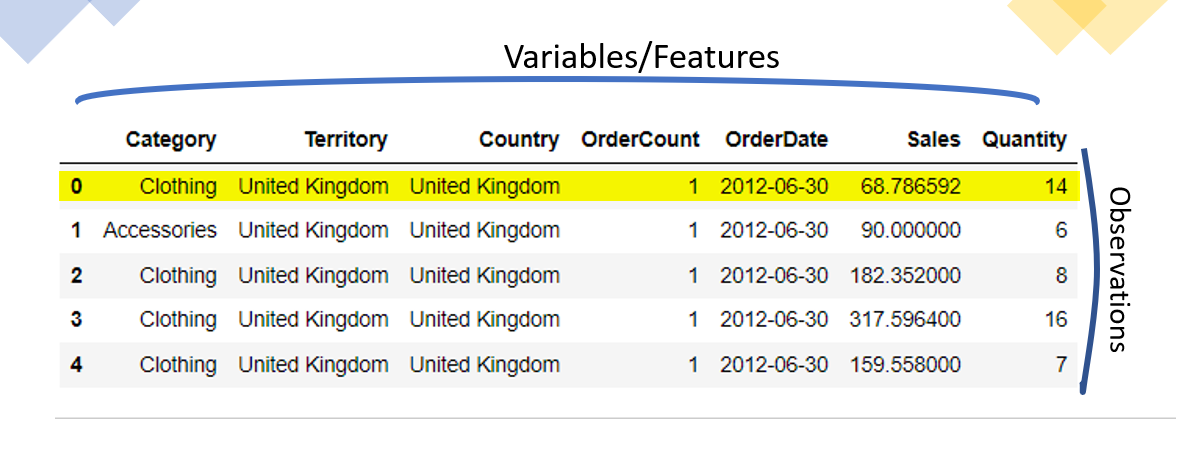

In [9]:
#Some terminology: Variable and Observations
Image(filename=r'C:\Users\hnawaz\Pictures\wallpapers\Variables & Obersvations1.png') 

## Most common variables we work with are Categorical and Numeric.
### Category & Territory column is an example of Categorical
### Sales & Quantity column is an example of Numeric
#### Numeric varaibles can be discrete or continous. Quantity is discrete as it an exact number. Sales is continous as it includes fractions.

In [10]:
#Quantity is discrete as it an exact number. Each observation falls on a value on an integer.
df.Quantity.unique()

array([14,  6,  8, 16,  7,  2,  1,  3,  4,  5, 10, 13, 12, 18, 15, 11,  9,
       17, 23, 34, 19, 33, 24, 41, 38, 27, 26, 21, 20, 31, 25, 22, 32, 28,
       29, 39, 44, 36, 40, 30, 35], dtype=int64)

In [11]:
#Sales is continous as it includes fractions.It can fall between two numbers i.e. 68.78
df.Sales.unique()

array([  68.786592,   90.      ,  182.352   , ..., 2466.4185  ,
        436.69505 ,   58.383   ])

In [12]:
#check how many columns and rows we have
df.shape

(60880, 8)

In [13]:
#let let's look at our data's stats
#mainly focus on Sales...
#Inner quartile range (IQR): 
#The difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q₃ − Q₁.
#1,466.01-127.80 = 1338.21
#Boxplot use this range with the line that represents the median, in the middle.
df[['Sales','Quantity']].describe()

,Sales,Quantity
count,60880.000000,60880.000000
mean,1322.071356,3.523587
std,2124.171872,3.033950
min,1.374000,1.000000
25%,127.800000,2.000000
50%,461.694000,3.000000
75%,1466.010000,4.000000
max,27893.619000,44.000000


In [14]:
print("\n----------- Calculate Mode -----------\n")
print(df['Sales'].mode())


----------- Calculate Mode -----------

0    419.4589
dtype: float64


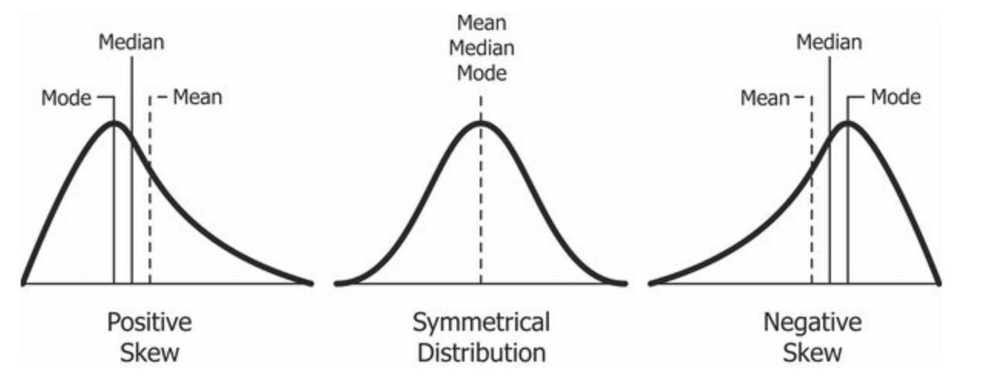

In [15]:
#Let's go over the data distribution. Check Skewness in our data..
Image(filename=r'C:\Users\hnawaz\Pictures\wallpapers\Skewness.png') 

<AxesSubplot:xlabel='Sales', ylabel='Density'>

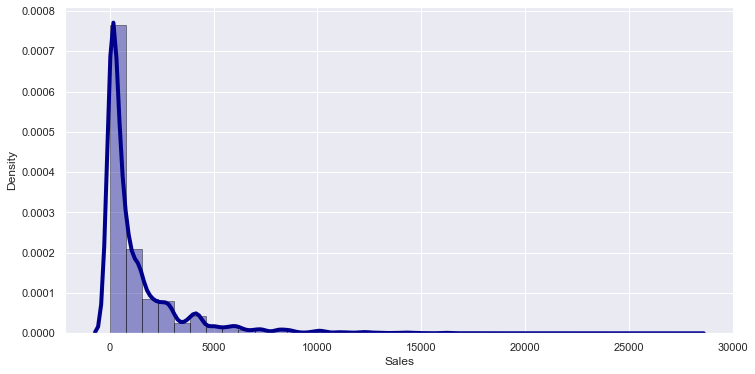

In [16]:
# Density Plot and Histogram of Sales Amount..Showcases positive skewness. Tail is to the right of Mean.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#
plt.figure(figsize=(12,6))
sns.distplot(df['Sales'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [18]:
### Our data is unimodal since it has one peaks. 

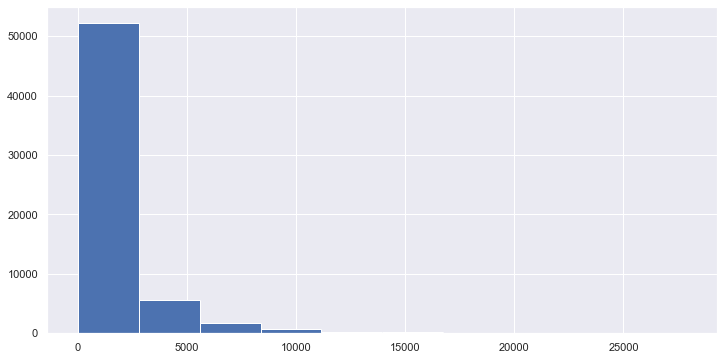

In [17]:
# let's create a histogram to further support positive skewness.
plt.figure(figsize=(12,6))
plt.hist( df['Sales'])
plt.show()

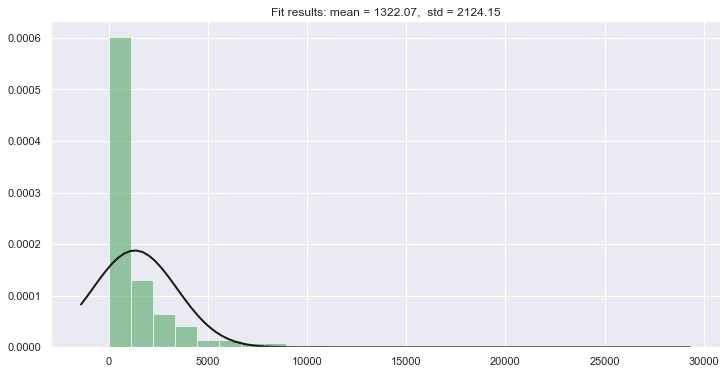

In [19]:
# Check Sales data distribution.
#from scipy.stats import norm
data = df['Sales']

# Fit a normal distribution to the data:
mn, std = norm.fit(data)

# Plot the histogram.
plt.figure(figsize=(12,6))
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mn, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mean = %.2f,  std = %.2f" % (mn, std)
plt.title(title)

plt.show()

### Detect Outlier in Sales

<AxesSubplot:xlabel='Sales'>

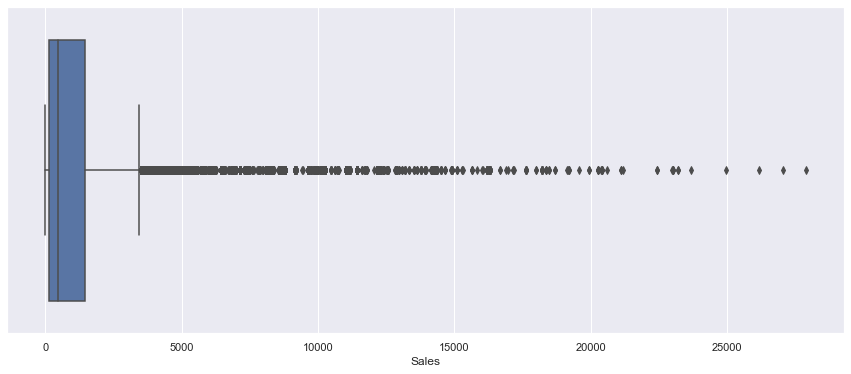

In [20]:
#Inner quartile Range: The difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q₃ − Q₁.
#Boxplot use the IQR range with the line that represents the median.
#The whiskers = Q3 + 1.5 X IQR. Any value outside of the whiskers is called the outlier. We will use this technique to remove 
#outliers from our dataframe below.
#Detecting Outliers
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Sales'])

### Remove Outliers with below function.
<p>Based on above Q3: 1466 + (1.5 * IQR) = (Whiskers): 3473). So anything above 3473 is an outlier. </p>
1466.01 (75 %) - 127.8 (25 %) = 1338.21

In [47]:
Q1 = df.Sales.quantile(0.25)
Q3 = df.Sales.quantile(0.75)
print("75% " + str(Q3))
print('25% ' + str(Q1))
print("Median: " + str(df.Sales.median()))
IQR = Q3 - Q1
print("Inner Quartile Range: " + str(IQR))

75% 1466.01
25% 127.8
Median: 461.694
Inner Quartile Range: 1338.21


In [51]:
#These are the values will be removed by below function. 
LTV=Q1 - 1.5 * IQR
UTV=Q3 + 1.5 * IQR
print(str(LTV))
print(UTV)

-1879.515
3473.325


In [23]:
#function to remove outliers based on quartiles
def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(df[i].median())
            else:
                p.append(j)
        df[i]=p
    return df

In [49]:
#detect and delete outliers...if need be.
outlier_detect(df)

,productcategory,productsubcategory,product,saleterritory,Country,City,Sate,Customer,Employee,OrderCount,OrderDate,StandardCost,UnitPrice,UnitPriceDiscount,Discount,ListPrice,SaleswithStandard,NetSales,OrderQuantity,Sales
0,Clothing,Caps,AWC Logo Cap,United Kingdom,United Kingdom,Berks,England,Gary Suess,Amy Alberts,1.0,2012-06-30,6.9223,5.0136,0.0,0.0,8.6442,96.9122,-28.125608,3.0,68.786592
1,Accessories,Locks,Cable Lock,United Kingdom,United Kingdom,Berks,England,Gary Suess,Amy Alberts,1.0,2012-06-30,10.3125,15.0000,0.0,0.0,25.0000,61.8750,28.125000,6.0,90.000000
2,Clothing,Gloves,"Full-Finger Gloves, L",United Kingdom,United Kingdom,Berks,England,Gary Suess,Amy Alberts,1.0,2012-06-30,15.6709,22.7940,0.0,0.0,37.9900,125.3672,56.984800,3.0,182.352000
3,Clothing,Gloves,"Full-Finger Gloves, L",United Kingdom,United Kingdom,London,England,Linda Martin,Amy Alberts,1.0,2012-06-30,15.6709,20.8945,0.0,0.0,37.9900,250.7344,66.862000,3.0,317.596400
4,Clothing,Gloves,"Full-Finger Gloves, M",United Kingdom,United Kingdom,Berks,England,Gary Suess,Amy Alberts,1.0,2012-06-30,15.6709,22.7940,0.0,0.0,37.9900,109.6963,49.861700,7.0,159.558000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60875,Clothing,Shorts,"Women's Mountain Shorts, L",Southeast,United States,Decatur,Georgia,Pamela Cox,Tsvi Reiter,1.0,2014-05-01,26.1763,41.9940,0.0,0.0,69.9900,209.4104,126.541600,3.0,335.952000
60876,Clothing,Shorts,"Women's Mountain Shorts, L",Southeast,United States,Miami,Florida,Stephanie Conroy,Tsvi Reiter,1.0,2014-05-01,26.1763,41.9940,0.0,0.0,69.9900,157.0578,94.906200,6.0,251.964000
60877,Clothing,Shorts,"Women's Mountain Shorts, M",Southeast,United States,Decatur,Georgia,Pamela Cox,Tsvi Reiter,1.0,2014-05-01,26.1763,41.9940,0.0,0.0,69.9900,78.5289,47.453100,3.0,125.982000
60878,Clothing,Shorts,"Women's Mountain Shorts, S",Southeast,United States,Decatur,Georgia,Pamela Cox,Tsvi Reiter,1.0,2014-05-01,26.1763,41.9940,0.0,0.0,69.9900,130.8815,79.088500,5.0,209.970000


<AxesSubplot:xlabel='Sales'>

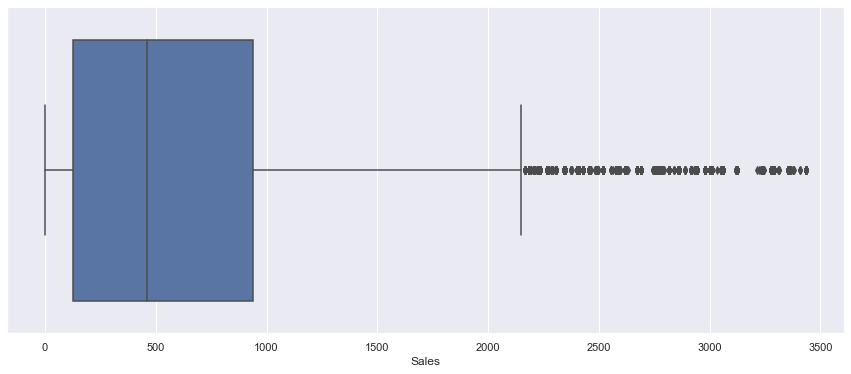

In [50]:
#let's plot a box plot see if there is any improvement. 
plt.figure(figsize=(15,6))
sns.boxplot(x= df['Sales'])

In [52]:
#drop duplicate values
df = df.drop_duplicates()
df.head(5)

,productcategory,productsubcategory,product,saleterritory,Country,City,Sate,Customer,Employee,OrderCount,OrderDate,StandardCost,UnitPrice,UnitPriceDiscount,Discount,ListPrice,SaleswithStandard,NetSales,OrderQuantity,Sales
0,Clothing,Caps,AWC Logo Cap,United Kingdom,United Kingdom,Berks,England,Gary Suess,Amy Alberts,1.0,2012-06-30,6.9223,5.0136,0.0,0.0,8.6442,96.9122,-28.125608,3.0,68.786592
1,Accessories,Locks,Cable Lock,United Kingdom,United Kingdom,Berks,England,Gary Suess,Amy Alberts,1.0,2012-06-30,10.3125,15.0000,0.0,0.0,25.0000,61.8750,28.125000,6.0,90.000000
2,Clothing,Gloves,"Full-Finger Gloves, L",United Kingdom,United Kingdom,Berks,England,Gary Suess,Amy Alberts,1.0,2012-06-30,15.6709,22.7940,0.0,0.0,37.9900,125.3672,56.984800,3.0,182.352000
3,Clothing,Gloves,"Full-Finger Gloves, L",United Kingdom,United Kingdom,London,England,Linda Martin,Amy Alberts,1.0,2012-06-30,15.6709,20.8945,0.0,0.0,37.9900,250.7344,66.862000,3.0,317.596400
4,Clothing,Gloves,"Full-Finger Gloves, M",United Kingdom,United Kingdom,Berks,England,Gary Suess,Amy Alberts,1.0,2012-06-30,15.6709,22.7940,0.0,0.0,37.9900,109.6963,49.861700,7.0,159.558000


In [53]:
df.count()

productcategory       60841
productsubcategory    60841
product               60841
saleterritory         60880
Country               60880
City                  60880
Sate                  60880
Customer              60880
Employee              60880
OrderCount            60880
OrderDate             60880
StandardCost          60841
UnitPrice             60880
UnitPriceDiscount     60880
Discount              60880
ListPrice             60841
SaleswithStandard     60841
NetSales              60841
OrderQuantity         60880
Sales                 60880
dtype: int64

In [55]:
#check for nulls or missing values
print(df.isnull().sum())

productcategory       39
productsubcategory    39
product               39
saleterritory          0
Country                0
City                   0
Sate                   0
Customer               0
Employee               0
OrderCount             0
OrderDate              0
StandardCost          39
UnitPrice              0
UnitPriceDiscount      0
Discount               0
ListPrice             39
SaleswithStandard     39
NetSales              39
OrderQuantity          0
Sales                  0
dtype: int64


In [56]:
 # Dropping the missing values.
df = df.dropna() 
df.count()

productcategory       60841
productsubcategory    60841
product               60841
saleterritory         60841
Country               60841
City                  60841
Sate                  60841
Customer              60841
Employee              60841
OrderCount            60841
OrderDate             60841
StandardCost          60841
UnitPrice             60841
UnitPriceDiscount     60841
Discount              60841
ListPrice             60841
SaleswithStandard     60841
NetSales              60841
OrderQuantity         60841
Sales                 60841
dtype: int64

In [57]:
print(df.isnull().sum())

productcategory       0
productsubcategory    0
product               0
saleterritory         0
Country               0
City                  0
Sate                  0
Customer              0
Employee              0
OrderCount            0
OrderDate             0
StandardCost          0
UnitPrice             0
UnitPriceDiscount     0
Discount              0
ListPrice             0
SaleswithStandard     0
NetSales              0
OrderQuantity         0
Sales                 0
dtype: int64


### Univariate Analysis: Categorical Varaible with count of values

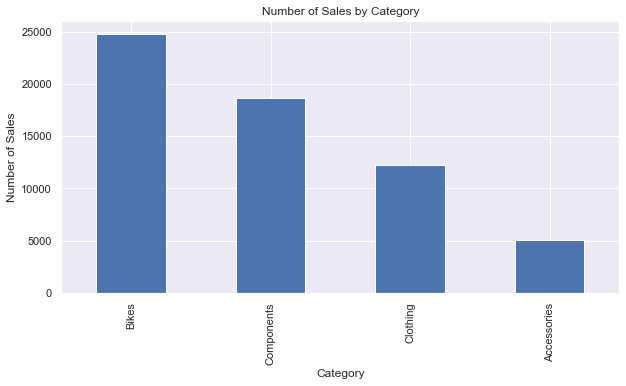

In [60]:
#Analysis of one variable with count 
df.productcategory.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of Sales by Category")
plt.ylabel('Number of Sales')
plt.xlabel('Category');

In [32]:
df.Category.value_counts()

Components     11268
Clothing        7733
Bikes           7048
Accessories     3494
Name: Category, dtype: int64

In [33]:
#find frequency of each Category
tab = pd.crosstab(index=df['Category'], columns=['Relative Frequency'])
#if you need to find relative frequency of a value then you take that value and divide it by the total.
#i.e. Total of all categories is: 26153. If we want to find relative frequency of Components then we would divide
# Components by Total 11014/26153 = 0.421088852
#tab
#find proportions 
tab/tab.sum()
#Percentage

col_0,Relative Frequency
Category,
Accessories,0.118268
Bikes,0.238568
Clothing,0.261754
Components,0.381410


### Bivariate Analysis: Two varaibles.

In [34]:
ct = pd.crosstab(df['Category'],df['Country']) #add normalize to see percentages: normalize='columns'
ct

Country,Australia,Canada,France,Germany,United Kingdom,United States
Category,,,,,,
Accessories,125,604,281,210,277,1997
Bikes,174,1025,490,291,606,4462
Clothing,211,1318,597,333,585,4689
Components,309,1898,879,387,868,6927


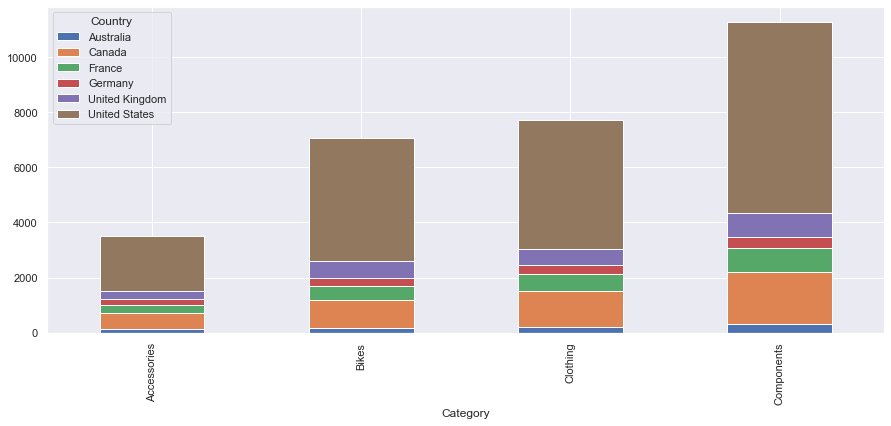

In [35]:
ct.plot.bar(stacked=True,figsize=(15,6))
#plt.legend(title='Country')
plt.show()

In [36]:
stacked = ct.stack().reset_index().rename(columns={0:'value'})
stacked

,Category,Country,value
0,Accessories,Australia,125
1,Accessories,Canada,604
2,Accessories,France,281
3,Accessories,Germany,210
4,Accessories,United Kingdom,277
5,Accessories,United States,1997
6,Bikes,Australia,174
7,Bikes,Canada,1025
8,Bikes,France,490
9,Bikes,Germany,291


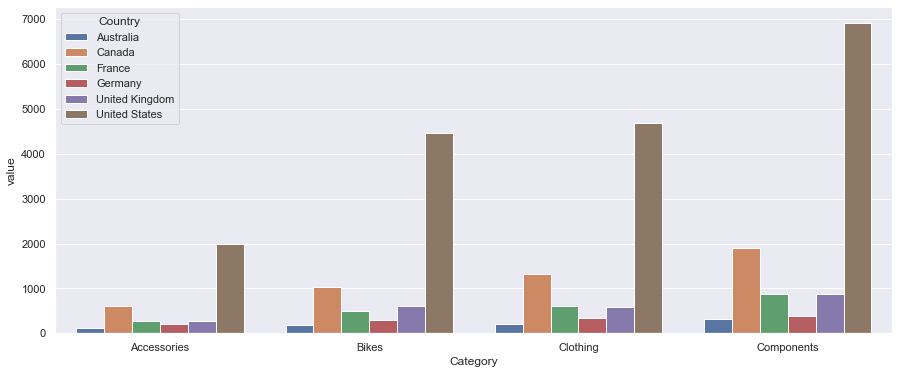

In [37]:
# plot grouped bar chart by catagories
plt.figure(figsize=(15,6))
bi = sns.barplot(x=stacked.Category, y=stacked.value, hue=stacked.Country)

### Bivariate continues with two categorical and numeric varaible.

In [42]:
bi_v = df.groupby(['Category', 'Country']).mean()[['Sales', 'Discount']]
#d_v = bi_v[bi_v['Discount']> 0]
#d_v
bi_v

Sales  Discount
Category    Country                              
Accessories Australia        143.691409       0.0
            Canada           132.393144       0.0
            France           152.795425       0.0
            Germany          152.585911       0.0
            United Kingdom   131.726289       0.0
            United States    114.444791       0.0
Bikes       Australia       1342.060809       0.0
            Canada          1470.154364       0.0
            France          1479.236081       0.0
            Germany         1376.663096       0.0
            United Kingdom  1473.103598       0.0
            United States   1444.591208       0.0
Clothing    Australia        156.463640       0.0
            Canada           172.925174       0.0
            France           169.202676       0.0
            Germany          175.409192       0.0
            United Kingdom   162.603538       0.0
            United States    158.246662       0.0
Components  Australia        385.209049       0.0
            Canada           626.633602       0.0
            France           593.895504       0.0
            Germany          505.315984       0.0
            United Kingdom   546.490868       0.0
            United States    586.501194       0.0

<AxesSubplot:xlabel='Category,Country'>

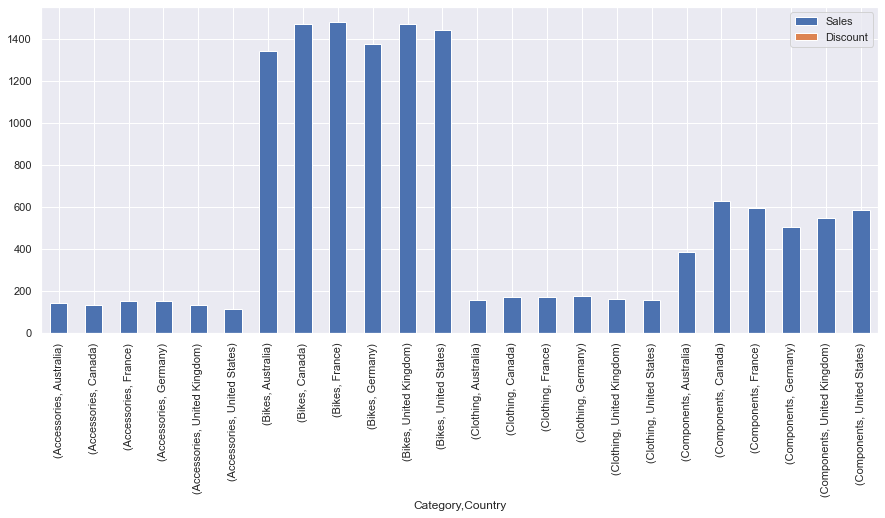

In [44]:
bi_v.plot.bar(stacked=True, figsize=(15,6))

<h4>By convention we plot the independent varaible on X-axis and dependent varaible on Y-axis.</h4>
<P>It's all about direction of causation. Let's say we hypothesis that change in Discount may affect the Sales.
As we offer more discount it yield in higher sales. We think that a change in sales does not have impace on Discount.
Sales maybe dependent of Discount and there maybe a causative relationship.</p>


<h5>Interpreting the value of ρ </h5>
<ul>
<li> 0.9 to 1 positive or negative indicates a very strong correlation.</li>
<li> 0.7 to 0.9 positive or negative indicates a strong correlation.</li>
<li> 0.5 to 0.7 positive or negative indicates a moderate correlation.</li>
<li> 0.3 to 0.5 positive or negative indicates a weak correlation.</li>
<li> 0 to 0.3 positive or negative indicates a negligible correlation.</li>
</ul>

<AxesSubplot:xlabel='UnitPrice', ylabel='Sales'>

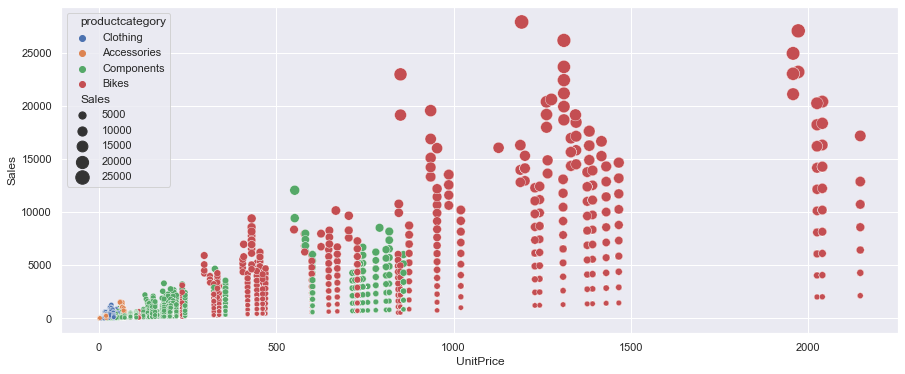

In [517]:
#two numeric and one categorical varaible. Correlation between Discount and Sales.
#markers = {"Clothing": "s", "Accessories": "v", "Components": "o", "Bikes": "x"}
plt.figure(figsize=(15,6))
sns.scatterplot(data=df, x="UnitPrice", y="Sales", hue="productcategory",size="Sales",
                sizes=(20, 200), palette="deep", legend="auto")

In [509]:
#Let's check the correlatoin using corr method.
#0 to 0.3 positive or negative indicates a negligible correlation.
df['Discount'].corr(df['Sales'])

0.17460375739090866

In [512]:
df['UnitPrice'].corr(df['Sales'])

0.7249845048376867

In [510]:
pearson_coef, p_value = stats.pearsonr(df["Discount"], df["Sales"]) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results 

Pearson Correlation Coefficient:  0.17460375739090123 and a P-value of: 0.0


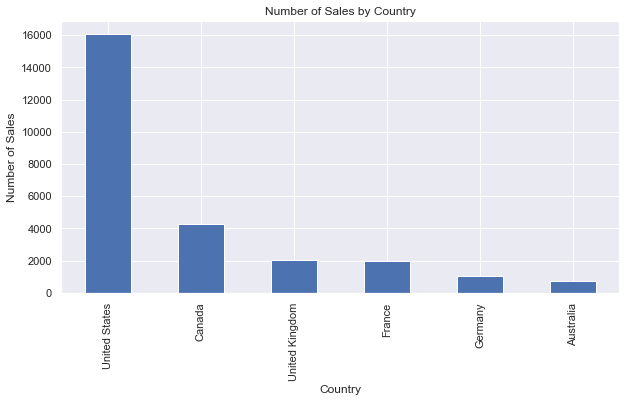

In [64]:
ndf.Country.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of Sales by Country")
plt.ylabel('Number of Sales')
plt.xlabel('Country');

In [518]:
# Grouping countries by Sales to get actual sales numbers
country_sales = df.groupby('Country')['Sales'].sum().sort_values(ascending = False)
pd.options.display.float_format = '{:,.2f}'.format
country_sales

Country
United States    53,607,801.20
Canada           14,377,925.59
France            4,607,537.93
United Kingdom    4,279,008.82
Germany           2,021,095.26
Australia         1,594,335.37
Name: Sales, dtype: float64

In [523]:
#get year from date
df['Year'] = df['OrderDate'].dt.year
df.head()

,productcategory,productsubcategory,product,saleterritory,Country,City,Sate,Customer,Employee,OrderCount,...,StandardCost,UnitPrice,UnitPriceDiscount,Discount,ListPrice,SaleswithStandard,NetSales,OrderQuantity,Sales,Year
0,Clothing,Caps,AWC Logo Cap,United Kingdom,United Kingdom,Berks,England,Gary Suess,Amy Alberts,1,...,6.92,5.01,0.02,1.40,8.64,96.91,-28.13,14,68.79,2012
1,Accessories,Locks,Cable Lock,United Kingdom,United Kingdom,Berks,England,Gary Suess,Amy Alberts,1,...,10.31,15.00,0.00,0.00,25.00,61.88,28.12,6,90.00,2012
2,Clothing,Gloves,"Full-Finger Gloves, L",United Kingdom,United Kingdom,Berks,England,Gary Suess,Amy Alberts,1,...,15.67,22.79,0.00,0.00,37.99,125.37,56.98,8,182.35,2012
3,Clothing,Gloves,"Full-Finger Gloves, L",United Kingdom,United Kingdom,London,England,Linda Martin,Amy Alberts,1,...,15.67,20.89,0.05,16.72,37.99,250.73,66.86,16,317.60,2012
4,Clothing,Gloves,"Full-Finger Gloves, M",United Kingdom,United Kingdom,Berks,England,Gary Suess,Amy Alberts,1,...,15.67,22.79,0.00,0.00,37.99,109.70,49.86,7,159.56,2012


<AxesSubplot:xlabel='Year'>

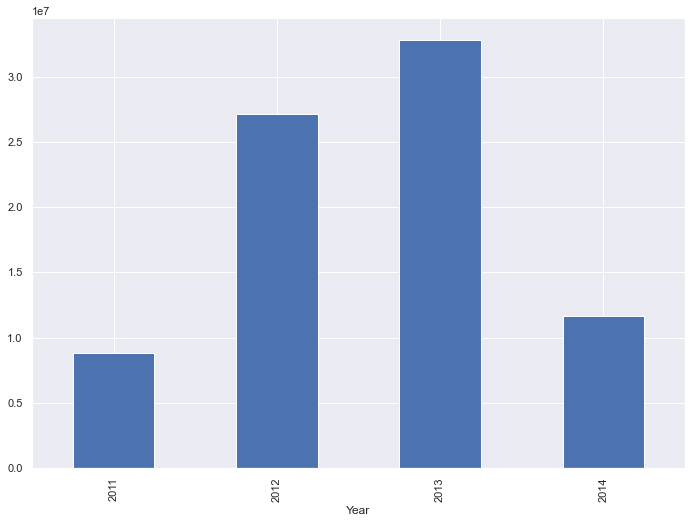

In [314]:
#Plot data by year...
# we have four years of sales data. 2012 and 2013 are our best year. Our sales are down for 2014. 
# we can furhter invesitiage why 2014 sales are down?
df.groupby('Year')['Sales'].sum().plot(kind='bar')

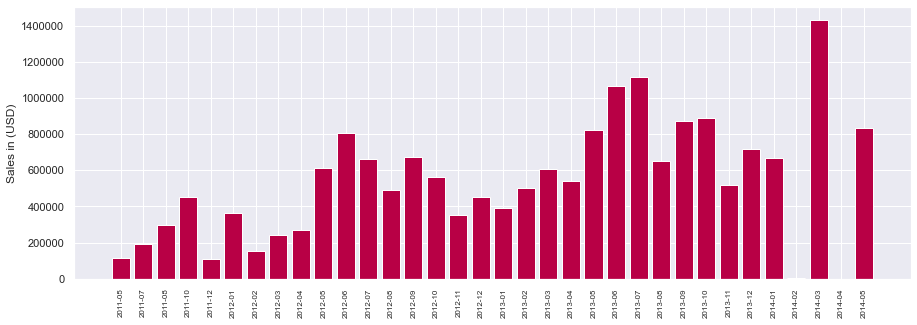

In [467]:
#Sales by Month
df['Month_Year'] = df['OrderDate'].apply(lambda x: x.strftime('%Y-%m'))
#sum data at month month level
result = df.groupby('Month_Year')['Sales'].sum().reset_index()
#get unique months
months = [month for month, df in df.groupby('Month_Year')]
plt.figure(figsize=(15,5))
#To show y-axis actual values
plt.ticklabel_format(style = 'plain')
plt.bar(months, result['Sales'], color= "#b80045")
plt.xticks(months, rotation='vertical', size= 8)
plt.ylabel('Sales in (USD)')
#plt.xlabel('Months')
plt.show()

<h3>Anamoly detection:</h3>
<p>Anomaly detection is the identification of rare items, events 
or observations which raise suspicions by differing significantly from the majority of the data.</p>

In [468]:
#check 2014 data to see why Feb and April is not producing any bars?
# we have two months with very low sales. This is a huge drop if we look at average monthly sale. 
#But following month we have a record breaking month. This is alarming as our sales swing from one extreme to another.
#We need to further examine what is causing this drop.
yr = df[df['OrderDate'].dt.year == 2014]
yr.groupby('Month_Year')['Sales'].sum()

Month_Year
2014-01     669,741.97
2014-02       1,826.48
2014-03   1,431,407.39
2014-04         755.78
2014-05     833,629.65
Name: Sales, dtype: float64

In [344]:
#compare 2014 data to 2012 or 2013 to check monthly sales amount...
yr11 = df[df['OrderDate'].dt.year == 2012]
yr11.groupby('Month_Year')['Sales'].sum()

Month_Year
2012-01   3,356,069.34
2012-02     882,899.94
2012-03   2,269,116.71
2012-04   1,001,803.77
2012-05   2,393,689.52
2012-06   3,601,190.71
2012-07   2,885,359.20
2012-08   1,802,154.21
2012-09   3,053,816.33
2012-10   2,185,213.21
2012-11   1,317,541.83
2012-12   2,384,846.59
Name: Sales, dtype: float64

In [358]:
#Let's check the Discount to see if this has any impact on the sales.
yr = df[df['OrderDate'].dt.year == 2014]
yr.groupby(['Month_Year','productcategory'])['Sales','Discount'].sum()

Sales  Discount
Month_Year productcategory                       
2014-01    Accessories        19,010.00      1.01
           Bikes           2,431,349.18  2,181.21
           Clothing           54,727.44    364.26
           Components        233,566.99      0.00
2014-02    Accessories            41.99      0.00
           Components          2,141.39      0.00
2014-03    Accessories        68,273.97    600.00
           Bikes           4,444,823.17 18,599.96
           Clothing          150,378.36  2,200.31
           Components        855,667.14     14.73
2014-04    Accessories            41.99      0.00
           Components            713.80      0.00
2014-05    Accessories        38,569.16    241.56
           Bikes           2,716,128.86 11,709.74
           Clothing           83,642.49    962.71
           Components        577,138.55     25.19

In [367]:
bc = df[df['productcategory'].isin(['Bikes','Clothing'])]
bc = bc[bc['Month_Year'].isin(['2014-01','2014-03','2014-05'])]
bc.groupby(['Month_Year','productcategory'])['Sales','Discount'].sum()

Sales  Discount
Month_Year productcategory                       
2014-01    Bikes           2,431,349.18  2,181.21
           Clothing           54,727.44    364.26
2014-03    Bikes           4,444,823.17 18,599.96
           Clothing          150,378.36  2,200.31
2014-05    Bikes           2,716,128.86 11,709.74
           Clothing           83,642.49    962.71

In [369]:
bc.groupby(['Month_Year','Country'])['Sales','Discount'].sum()

Sales  Discount
Month_Year Country                              
2014-01    Australia        186,882.16     42.28
           Canada           410,147.76    398.35
           France            76,242.22    312.67
           Germany          130,268.44      0.00
           United Kingdom   273,272.43     91.52
           United States  1,409,263.62  1,700.65
2014-03    Australia        154,922.07      0.00
           Canada           630,378.60  2,610.16
           France           533,018.51  2,925.42
           Germany          295,955.70  1,027.21
           United Kingdom   258,777.05    745.15
           United States  2,722,149.60 13,492.33
2014-05    Australia        191,750.68    295.45
           Canada           461,899.91  2,271.39
           France            95,051.81    327.23
           Germany          112,783.65    226.00
           United Kingdom   356,317.30  2,066.44
           United States  1,581,968.00  7,485.96

<AxesSubplot:title={'center':'Most Orders for country'}, xlabel='Country'>

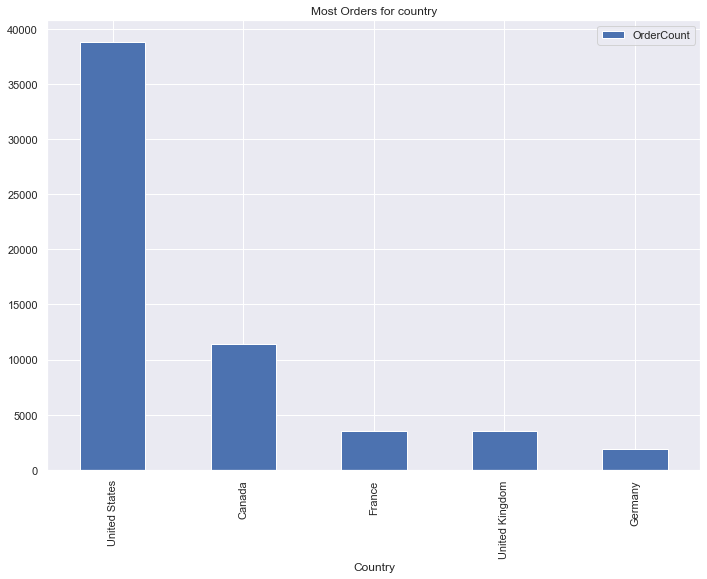

In [372]:
#Countries with more number of customers
order_id = pd.DataFrame(df.groupby('Country')['OrderCount'].count().sort_values(ascending = False))
order_id[:5].plot(kind = 'bar', title = 'Most Orders for country')